<h1 style="font-family: Georgia; font-size:3em;color:#2462C0; font-style:bold">Linear Regression
</h1><br>
In this exercise we'll implement linear regression using:
* Normal Equation
* Gradient Descent

As we'll see see, the weights will be the same across both methods.

The objective of linear regression is to fit a straight line to the data that minimizes the sum of the squared errors. The way to measure the error of each example is by taking a vertical line from the example to the straight line as shown below.

<p akign="center">
<img src="images/error.jpg">
<caption><center><b><u><font color="purple">Figure 1:</font></u></b> Error for linear regression</center></caption>
</p>

In linear algebra terminology, we try to project the data onto a straight line that is the closest to the data which is still in the column space of the feature matrix. Note that the target variable is not usually in the column space of the feature matrix and the only way to solve it is by taking projection onto a straight line that minimizes the square of the projection errors and still be in the column space of the feature matrix. Linear regression with one feature is called *univariate linear regression*. However; if we have two or more features, it's called *multivariate linear regression*.

The hypothesis function:
$$h_{\theta}(x^i) = \theta_0 + \theta_1x_1^i + \theta_2x_2^i + ... + \theta_nx_n^i$$
The objective function:
$$\min_\theta\ J(\theta) = \frac{1}{2m}\sum_{i = 1}^{m}(h_{\theta}(x^i) - y^i)^2$$
The cost function is half mean squared error ($MSE$). $\theta$ that minimizes half of $MSE$ is the same $\theta$ that minimizes $MSE$ but we put 2 in the denominator for convenience so that it would cancel out when we take the derivative of the cost function w.r.t $\theta$.

Let's first start by importing some libraries and examining the data.

In [1]:
# importing libraries
import numpy as np
from numpy.linalg import pinv # Importing pseudoinverse to use in normal equation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import locale; locale.setlocale(locale.LC_ALL, ''); # to have a nice represetation of of house prices in US dollars

%matplotlib inline
filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_context('notebook')

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Normal Equation Method
</h2><br>
*Normal Equation* method solves for $\theta$ analytically. That means we take the derivative of the cost function $J(\theta)$ w.r.t each $\theta^j$ and set it equal to 0. Then, we would end up having n-derivatives and solve as a system of linear equations to get the values of all $\theta^js$. Below is the derivation in matrix form:

The error is: $e = y - X\theta$ where $y$ is the target variable vector and $X\theta$ is hypothesis vector.
$$e^Te = (y - X\theta)^T(y - X\theta)\\{}$$
$$\Rightarrow e^Te = y^Ty - 2\theta^TX^Ty + \theta^TX^TX\theta\\{}$$
$$\frac{\partial}{\partial\theta}e^Te = -2X^Ty + 2X^TX\theta = 0\\{}$$
$$\Rightarrow\theta = (X^TX)^{-1}X^Ty$$
Note that $X^TX$ may not be invertible if the rank $r < n$ which may be the case if:
1. Some features are linearly dependent on other features. That is, we can write some featutes as a linear combinations of other features. To solve this issue, delete linearly dependent features or add regularization term.
2. Number of examples $m$ is less than number of features $n$. Therefore, the rank of $X^TX$ would be $m$ and can't be inverted. We can use regularization to solve for this issue.

Since $(X^TX)\theta = X^Ty$, then $(X^TX)\theta = X^T(X\theta + e)$. Therefore,
$$X^Te = 0 \rightarrow x_0^Te = 0 \rightarrow \sum_{i = 1}^{m}e_i = 0$$
where $x_0$ is the bias $\Rightarrow$ errors and features are not correlated. Moreover, $E(y) = E(X)\theta + E(e)$. Therefore, $\bar{y} = \bar{X}\theta$ which means that the regression hyperplane passes through the means of features.

We have 47 training examples and two features: Size is square ft, and number of bedrooms. The output (target) variable is Price in US dollars. Below is the estimated $\theta$ using *normal equation method* along with a prediction for one example.

In [2]:
# Importing the data
data = pd.read_csv('../data/ex1data2.txt', header = None, names = ['Size', 'Bedrooms', 'Price'])
X = data.values[:, :-1]
y = data.values[:, -1]

# Number of training examples
m = X.shape[0]

# Insert ones in features matrix for the bias
X = np.insert(X, 0, np.ones(m), axis = 1)

# Compute theta
theta_opt = pinv(X.T.dot(X)).dot(X.T.dot(y))
print(f"Theta vector is: {np.round(theta_opt, 2)}")

# Predicting the price of a given house using parameters from Normal Eqn method
x = np.array([[1], [1650], [3]])
pred = round(float(theta_opt.T.dot(x)), 2)
print(f"The predicted house price is: {locale.currency(pred, grouping = True)}")

Theta vector is: [ 89597.91    139.21  -8738.02]
The predicted house price is: $293,081.46


<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Gradient Descent Method
</h2><br>
*Gradient Descent* method works as follows:
1. Initialize $\theta$ vector to zeros or any random numbers.
2. Pick a value for the learning rate $\alpha$. The learning rate determines how big the step would be on each iteration.
    * If $\alpha$ is very small, it would take long time to converge and become computationally expensive.
    * If $\alpha$ is large, it may fail to converge and overshoot the minimum.
    * Therefore, plot the cost function against different values of $\alpha$ and pick the value of $\alpha$ that is right before the first value that didn't converge so that we would have a very fast learning algorithm that converges.
<p akign="center">
<img src="images/learning_rate.PNG">
<caption><center><b><u><font color="purple">Figure 2:</font></u></b> Gradient descent with different learning rates.[Source](http://cs231n.github.io/neural-networks-3/)</center></caption>
</p>
    * The most commonly used rates are : *0.001, 0.003, 0.01, 0.03, 0.1, 0.3*.
3. Make sure to scale the data if it's on very different scales. If we don't scale the data, the level curves would be narrower and taller which means it would take longer time to converge.
<p akign="center">
<img src="images/normalized-vs-unnormalized.PNG">
<caption><center><b><u><font color="purple">Figure 3:</font></u></b> Gradient descent: normalized versus unnormalized level curves</center></caption>
</p>
    Scale the data to have $\mu = 0$ and $\sigma = 1$. Below is the formula for scaling each example:
$$\\{}$$
$$\frac{x_i - \mu}{\sigma}$$
4. On each iteration, take the partial derivative of the cost function $J(\theta)$ w.r.t each $\theta^j$ which is:
$$\\{}$$
$$\frac{\partial}{\partial\theta^j}J(\theta) = \frac{1}{m}\sum_{i - 1}^m(h_{\theta}(x^i) - y^i)x_j^i$$
The update equation is:
$$\theta^j = \theta^j - \alpha\Big(\frac{1}{m}\sum_{i - 1}^m(h_{\theta}(x^i) - y^i)x_j^i\Big)$$
    * Continue the process until the cost function converges. That is, until the error curve becomes flat and doesn't change.
    * Notice that if the slope of the current values of $\theta > 0$, that means that we're  to the right of optimal $\theta$ and the update will be negative and will start getting close to the optimal values of $\theta$. However, if it's negative, the update will be positive and will increase the current values of $\theta$ to converge to the optimal values of $\theta$.
<p akign="center">
<img src="images/gradients.PNG">
<caption><center><b><u><font color="purple">Figure 4:</font></u></b> Gradient descent. An illustration of how gradient descent algorithm uses the first derivative of the loss function to follow downhill it's minimum.</center></caption>
</p>
    * In addition, on each iteration, the step would be in the direction that gives the maximum change since it's perpendicular to level curves at each step.
Notice that on each iteration we sum up over all examples. This version of gradient descent is called **Batch-Gradient Descent**. Also, the cost function is *convex* which means that any local minimum the gradient descent finds is also a global minimum since it's twice differentiable and $\frac{\partial^2J(\theta)}{\partial\theta^2} \geq 0$.

Below are functions needed to perform gradient descent method.

In [3]:
# Normalize the data
def normalize_features(X):
    '''
    X: features matrix m x n
    Return: normalized features m x n, mu, and sigma
    '''
    mu = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# Compute the cost
def compute_cost(X, y, theta):
    '''
    X: features matrix m x (n + 1)
    y: target variable m x 1 vector
    theta: Parameters (n + 1) vector 
    Return: 1 / 2 * mean squared error
    '''
    m = len(y) # number of training samples
    prediction = X.dot(theta) - y
    squaredErrors = np.sum(np.power(prediction, 2))
    cost = (1 / (2 * m)) * squaredErrors

    return cost

# Compute the gradients
def gradient_descent(X, y, theta, alpha, iterations):
    '''
    X: features matrix m x (n + 1)
    y: target variable m x 1 vector
    theta: Parameters (n + 1) vector
    alpha: Learning rate --> scalar
    iterations: number of steps the gradient iterates over the theta parameter vector
    Returns: vector for the cost at each iteration, and the theta parameter vector
    '''
    m = len(y) # number of training samples
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        error = X.dot(theta) - y
        delta = (1 / m) * (X.T.dot(error))
        theta = theta - alpha * delta
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

Since Bedrooms and Size features are on two different scales, It's better to normalize them so that *Gardient Descent* converges and be faster. We'll first re-import the data and scale it. Second, we'll compute optimal theta using gradient descent method and plot the cost function against iterations. We'll use the most commonly used alpha values *0.001, 0.003, 0.01, 0.03, 0.1, 0.3* and see which one converges faster. Using the best value for $\alpha$, we'll run the learning algorithm to get the optimal theta and predict the same example that we used in normal equation method.

In [4]:
# Importing the data again
data = pd.read_csv('../data/ex1data2.txt', header = None, names = ['Size', 'Bedrooms', 'Price'])

# Convert to ndarrays
X = data.values[:, :-1]
y = data.values[:, -1].reshape(-1, 1)
m = X.shape[0]

# Normalize data
X_norm, mu, sigma = normalize_features(X)

# Add bias
X_norm = np.insert(X_norm, 0, np.ones(m), axis = 1)

# Initialize theta
theta_init = np.zeros(X_norm.shape[1]).reshape(-1, 1)

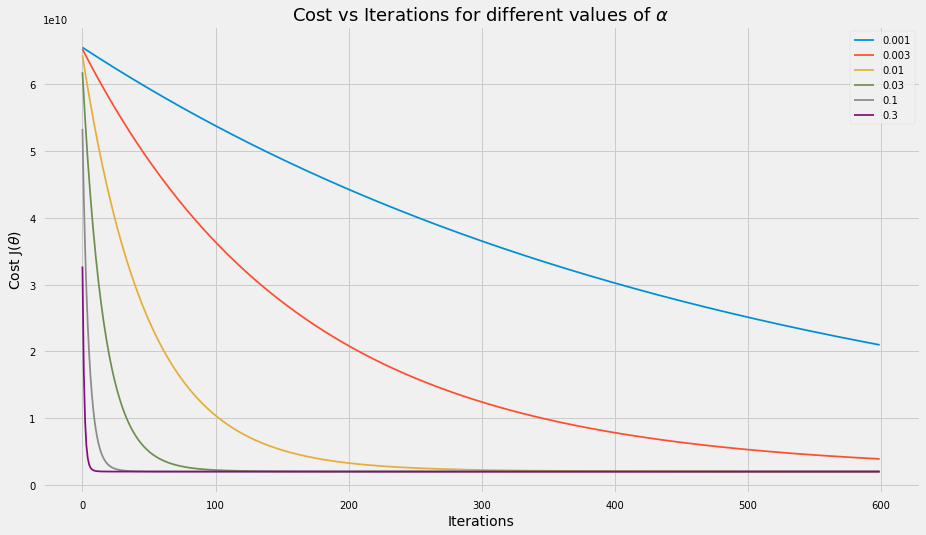

In [5]:
alpha_list = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
fig, ax = plt.subplots(figsize = (14, 8))
for alpha in alpha_list:
    # compute optimal theta and cost
    theta_opt, cost = gradient_descent(X_norm, y, theta_init, alpha, 600)
    # Plotting the cost function vs number of iterations
    ax.plot(np.arange(len(cost)), cost, label = str(alpha))
    plt.legend(loc = 'upper right', )
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel(r'Cost J($\theta$)', fontsize = 14)
plt.title(r'Cost vs Iterations for different values of $\alpha$', fontsize = 18);

It looks like $\alpha = 0.001$ is very small. The best value for $\alpha$ is 0.3. We'll run the algorithm using $\alpha = 0.3$ and then predict the example.

In [6]:
# Compute optimal theta and cost
theta_opt, cost = gradient_descent(X_norm, y, theta_init, 0.3, 600)
print(f"Theta vector is: {np.round(theta_opt.ravel(), 2)}")

# Predicting the price of a given house using parameters from Normal Eqn method
x_norm = np.array([[1], [(1650 - mu[0]) / sigma[0]], [(3 - mu[1]) / sigma[1]]])
pred = theta_opt.T.dot(x_norm)
print(f"The predicted house price is: {locale.currency(pred, grouping = True)}")

Theta vector is: [ 340412.66  109447.8    -6578.35]
The predicted house price is: $293,081.46


The predicted price is exactly the same one we got from normal equation method.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Conclusion
</h2><br>
As we noticed, all methods yield the same parameters.

Takeaways:
* Use Normal Equation method when number of features < 10,000 because:
    * Inverting the $X^TX$ matrix requires a lot of computing power.
    * Gradient Descent has two disadvantages:
        * Need to initiate alpha (learning rate).
        * Need to initiate number of iterations.
    * Therefore, **Use Gradient Descent ONLY when number of features > 10,000**.
* Optimal *Learning Rate* differs between applications. Therefore, try experiment some rates before applying gradient descent.
    * The most commonly used rates are : *0.001, 0.003, 0.01, 0.03, 0.1, 0.3*.
* Normalize features **ONLY** when using *Gradient Descent*.
* If you normalize features, you have to use the mean and the standard deviations from training examples when applying the model to test examples --> **NOT means and stds from test data**.
* Methods described above doesn't give the statistical significance of those features in predicting the target variable, i.e It **ONLY** chooses weights that minimizes the cost function.
* If the relationship is not linear, we can add linearity by adding polynomial features or interaction between features as long as the weights (parameters) are still linear.
* If the features are on different scales and have big differences in those scales such the number of bedrooms [1, 5] and size of the house in thousands sqft, we need to normalize; otherwise, the contours of the cost function will become narrower and taller $\rightarrow$ very slow to reach the minimum because the steps will be very small $\rightarrow$ huge number of steps to converge.
    * If the range of the features are [-3, 3] or [-1, 1], no need for normalization. Otherwise, if it's too small or too large then **Normalize** the features.